This notebook is for creating summary plots of stream metabolism parameters estimated from dissolved oxygen time series using the BASEmetab package of Grace et al. (2015). In-situ measurements collected from East Fork Creek in Franklin, TN by John C. Ayers, Weizhuo Jing, Kevin Chen, Ella Daugherty, and Gabriel Perez.  
Reference:
Grace MR, Giling DP, Hladyz S, et al (2015) Fast processing of diel oxygen curves: Estimating stream metabolism with BASE (BAyesian Single-station Estimation). Limnol. Oceanogr. methods / 13:e10011


In [3]:
import pandas as pd

# Load the data
data = pd.read_csv("EFC_StreamMetabolismSummary.csv")

# Display the first few rows of the dataframe
data.head()


,Date,Device,GPP.mean,GPP.sd,GPP.median,ER.mean,ER.sd,ER.median,NEP.mean,NEP.sd,NEP.median,PR.mean,PR.sd,PR.median,K.mean,K.sd,K.median
0,5/24/2022,MiniDOT,9.724921,0.397755,9.718426,24.543829,1.016071,24.540043,-14.818908,0.681979,-14.815466,0.396303,0.007375,0.396179,9.444339,0.405853,9.434647
1,5/25/2022,MiniDOT,8.379095,0.353796,8.366785,26.166950,1.059195,26.162258,-17.787855,0.742909,-17.782109,0.320234,0.005074,0.320231,11.687572,0.469452,11.682121
2,5/26/2022,MiniDOT,7.016506,0.506425,7.000212,32.861249,2.302127,32.816748,-25.844743,1.853357,-25.812503,0.213585,0.006465,0.213687,14.972180,1.058652,14.938265
3,6/4/2022,Exo2,14.578490,0.542414,14.574772,19.262054,0.773292,19.257909,-4.683564,0.359292,-4.670982,0.757041,0.012617,0.756872,8.885572,0.328489,8.881961
4,6/5/2022,Exo2,12.011935,0.439199,12.006980,15.501951,0.622592,15.497732,-3.490016,0.306524,-3.487460,0.775103,0.014233,0.775022,6.800502,0.257384,6.796968


Make a plot of GPP.mean versus ER.mean with error bars defined by GPP.sd and ER.sd. Add a reference line with a slope of 1 and intercept of zero.

Matplotlib is building the font cache; this may take a moment.


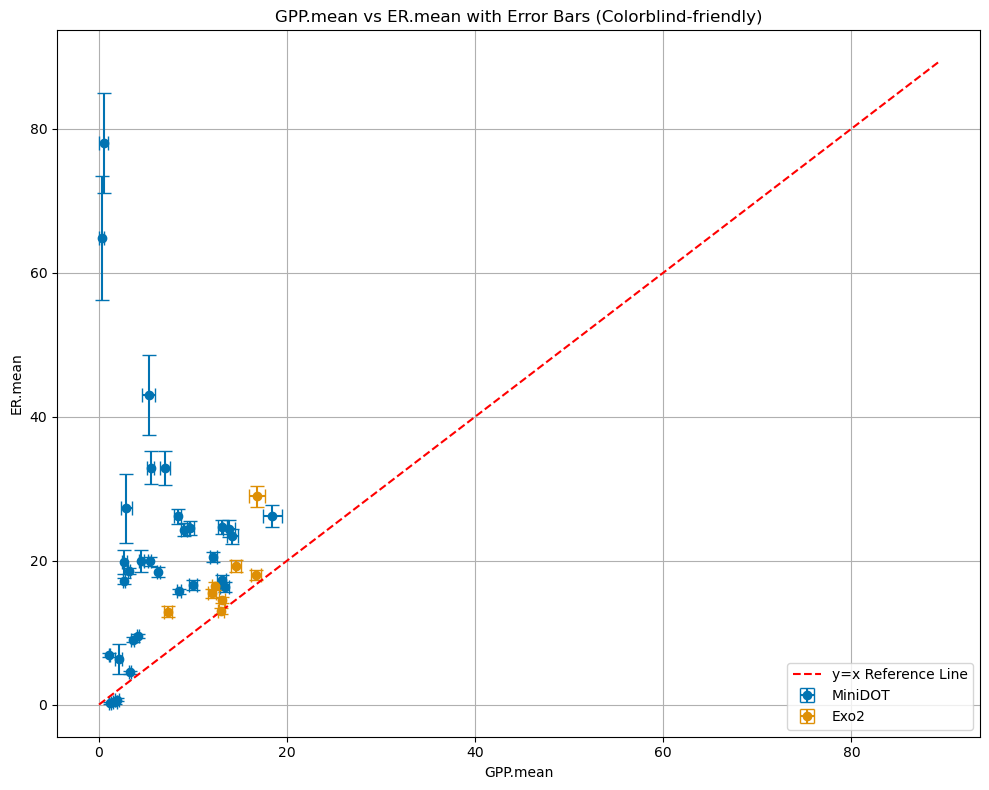

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Extract relevant data
x = data['GPP.mean']
y = data['ER.mean']
x_err = data['GPP.sd']
y_err = data['ER.sd']

# Extract unique device names for coloring
devices = data['Device'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(devices)))

# Define colorblind-friendly palette
colorblind_palette = ['#0173B2', '#DE8F05', '#029E73', '#D55E00', '#CC78BC', '#CA9161', '#FBAFE4']

# Ensure we have enough colors in our palette
if len(devices) > len(colorblind_palette):
    # If not, we will cycle the palette
    colorblind_palette = colorblind_palette * (len(devices) // len(colorblind_palette) + 1)

# Plotting
plt.figure(figsize=(10, 8))

# Plotting data points colored by device
for device, color in zip(devices, colorblind_palette):
    mask = data['Device'] == device
    plt.errorbar(x[mask], y[mask], xerr=x_err[mask], yerr=y_err[mask], fmt='o', label=device, color=color, capsize=5)

# Add reference line with slope of 1 and intercept of 0
xlims = plt.gca().get_xlim()
ylims = plt.gca().get_ylim()
max_limit = max(max(xlims), max(ylims))
plt.plot([0, max_limit], [0, max_limit], 'r--', label='y=x Reference Line')

plt.title('GPP.mean vs ER.mean with Error Bars (Colorblind-friendly)')
plt.xlabel('GPP.mean')
plt.ylabel('ER.mean')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Make a time series plot of GPP.mean, ER.mean, and NEP.mean with error bars defined by GPP.sd, ER.sd, and NEP.sd. x = "Date". Use a colorblind-friendly palette. Save the plot as a svg file.

In [7]:
# Convert "Date" column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Verify the conversion
data['Date'].head()

0   2022-05-24
1   2022-05-25
2   2022-05-26
3   2022-06-04
4   2022-06-05
Name: Date, dtype: datetime64[ns]

In [15]:
# Define series and their respective errors
series = {
    "GPP.mean": "GPP.sd",
    "ER.mean": "ER.sd",
    "NEP.mean": "NEP.sd"
}

import seaborn as sns
sns.set()

plt.figure(figsize=(12, 8))

# Define colors for each series
colors = ['red', 'green', 'blue']

# Plot each series with error bars
for i, (key, value) in enumerate(series.items()):
    sns.lineplot(x=data['Date'], y=data[key], label=key, color=colors[i])
    plt.fill_between(data['Date'], data[key] - data[value], data[key] + data[value], color=colors[i], alpha=0.2)

plt.title('Time Series of GPP.mean, ER.mean, and NEP.mean with Error Bars')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot as an SVG file
output_path_ts_simple = "Time_Series_Plot.svg"
plt.savefig(output_path_ts_simple, format="svg")
plt.close()
